In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd # to convert into a data frame
import numpy as np # TO CONVERT ANY COLUMN IN NDARRAY
from sklearn.metrics import accuracy_score

In [5]:
iris = datasets.load_iris()

In [6]:
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

In [7]:
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
print((y.columns.ndim))

1


In [8]:
# we are building the model
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(X)
print(clusters)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 2 1 2 1 1 1 2 2 2 1 2 2 2 2 2 1 2 2 3 1 3 3 3 3 2 3 3 3 1
 1 3 1 1 3 3 3 3 1 3 1 3 1 3 3 1 1 3 3 3 3 3 1 1 3 3 3 1 3 3 3 1 3 3 3 1 1
 3 1]


In [9]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
print(len(labels))
print(clusters)

150
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 2 1 2 1 1 1 2 2 2 1 2 2 2 2 2 1 2 2 3 1 3 3 3 3 2 3 3 3 1
 1 3 1 1 3 3 3 3 1 3 1 3 1 3 3 1 1 3 3 3 3 3 1 1 3 3 3 1 3 3 3 1 3 3 3 1 1
 3 1]


In [10]:
for i in range(4):
    #print(clusters)
    #print(clusters,i)
    cat = (clusters == i)
    print(cat)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]
[False False False False False False False False False False False False
 False False 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 1
 1 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 1
 2 1]
Accuracy =  0.88


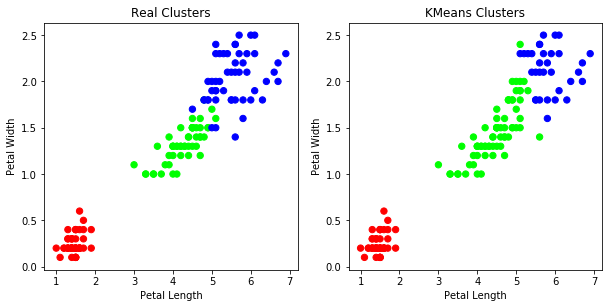

In [11]:
for i in range(4):
    cat = (clusters == i)
    labels[cat] = mode(iris.target[cat])[0]
print(labels)    
acc = accuracy_score(iris.target, labels)
print('Accuracy = ', acc)

plt.figure(figsize=(10, 10))
colormap = np.array(['red', 'lime', 'blue','black'])
plt.subplot(2, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.subplot(2, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[labels], s = 40)
plt.title('KMeans Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

# EM Algorithm


In [12]:
from sklearn import preprocessing

In [14]:
scaler = preprocessing.StandardScaler()
#print(X)
scaler.fit(X)
scaled_X = scaler.transform(X)
#print(scaled_X)

In [14]:
xs = pd.DataFrame(scaled_X, columns = X.columns)


Accuracy using GMM =  0.966666666667


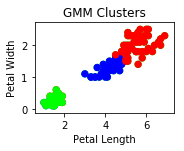

In [18]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y = gmm.predict(xs)

labels = np.zeros_like(clusters)

for i in range(3):
    cat = (gmm_y == i)
    labels[cat] = mode(iris.target[cat])[0]
    
acc = accuracy_score(iris.target, labels)
print("Accuracy using GMM = ", acc)

plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[gmm_y], s = 40)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.title('GMM Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()